In [1]:
# Let's import essential tools for this project !
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from plotly import __version__
print(__version__)
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

4.4.1


In [2]:
# Get the data ready !

covid_india = pd.read_csv("drive/MyDrive/covid_19/covid_19_india.csv")
covid_vac = pd.read_csv("drive/MyDrive/covid_19/covid_vaccine_statewise.csv")

### Let's do some investigation on the given data !

In [3]:
covid_india.describe()

,Sno,Cured,Deaths,Confirmed
count,14402.000000,1.440200e+04,14402.000000,1.440200e+04
mean,7201.500000,1.584072e+05,2525.111790,1.738016e+05
std,4157.643623,3.210715e+05,6723.661773,3.533578e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3601.250000,1.342000e+03,11.000000,2.498250e+03
50%,7201.500000,1.683550e+04,332.000000,2.204450e+04
75%,10801.750000,1.870605e+05,1936.000000,2.120525e+05
max,14402.000000,3.799266e+06,67985.000000,4.539553e+06


In [4]:
covid_india.shape

(14402, 9)

In [5]:
covid_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14402 entries, 0 to 14401
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       14402 non-null  int64 
 1   Date                      14402 non-null  object
 2   Time                      14402 non-null  object
 3   State/UnionTerritory      14402 non-null  object
 4   ConfirmedIndianNational   14402 non-null  object
 5   ConfirmedForeignNational  14402 non-null  object
 6   Cured                     14402 non-null  int64 
 7   Deaths                    14402 non-null  int64 
 8   Confirmed                 14402 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1012.8+ KB


In [6]:
covid_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [7]:
# Checks for null values !

covid_india.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
covid_vac.describe()

,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
count,3.840000e+03,3.841000e+03,3841.000000,3.841000e+03,3.841000e+03,3.841000e+03,3.841000e+03,3841.000000,3.841000e+03,3.841000e+03,0.0,3.841000e+03,3.885000e+03
mean,2.309368e+06,1.583014e+05,3113.288987,2.025454e+06,3.339927e+05,1.058114e+06,9.671222e+05,239.095288,1.996314e+05,2.040352e+06,NaN,2.025454e+06,2.332725e+06
std,9.294910e+06,7.974561e+05,10448.324251,9.044040e+06,1.510222e+06,4.730354e+06,4.314511e+06,1100.883084,9.358747e+05,9.405737e+06,NaN,9.044040e+06,1.047604e+07
min,7.420000e+02,1.000000e+00,1.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,NaN,7.000000e+00,0.000000e+00
25%,7.799050e+04,1.302000e+03,115.000000,2.940200e+04,0.000000e+00,1.374000e+04,1.350100e+04,1.000000,0.000000e+00,2.937900e+04,NaN,2.940200e+04,2.844400e+04
50%,3.924550e+05,8.532000e+03,702.000000,1.721780e+05,1.728000e+04,8.328300e+04,8.249100e+04,13.000000,2.950000e+02,1.832010e+05,NaN,1.721780e+05,1.901970e+05
75%,1.416248e+06,6.644700e+04,2470.000000,1.136590e+06,2.216900e+05,5.885480e+05,5.303950e+05,132.000000,9.087300e+04,1.086956e+06,NaN,1.136590e+06,1.311754e+06
max,1.238119e+08,1.078696e+07,124323.000000,1.238119e+08,2.545686e+07,6.461179e+07,5.918396e+07,16161.000000,1.392605e+07,1.353427e+08,NaN,1.238119e+08,1.492688e+08


In [9]:
covid_vac.shape

(3885, 15)

In [10]:
covid_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           3885 non-null   object 
 1   State                                3885 non-null   object 
 2   Total Individuals Registered         3840 non-null   float64
 3   Total Sessions Conducted             3841 non-null   float64
 4   Total Sites                          3841 non-null   float64
 5   First Dose Administered              3841 non-null   float64
 6   Second Dose Administered             3841 non-null   float64
 7   Male(Individuals Vaccinated)         3841 non-null   float64
 8   Female(Individuals Vaccinated)       3841 non-null   float64
 9   Transgender(Individuals Vaccinated)  3841 non-null   float64
 10  Total Covaxin Administered           3841 non-null   float64
 11  Total CoviShield Administered 

In [11]:
covid_vac.head()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
0,16/01/2021,India,6943622.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,48276.0,48276
1,17/01/2021,India,7119567.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,58604.0,58604
2,18/01/2021,India,7150780.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,99449.0,99449
3,19/01/2021,India,7423057.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,195525.0,195525
4,20/01/2021,India,7555207.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,251280.0,251280


In [12]:
print(covid_india["Date"].min())
print(covid_india["Date"].max())

2020-01-30
2021-04-30


In [13]:
covid_vac["State"].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Updated On', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [14]:
covid_india.sample()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
112,113,2020-03-12,6:00 PM,Rajasthan,1,2,0,0,3


## Let's drop unneede columns from covid_india !

In [15]:
covid_india = covid_india.drop(["Sno" , "ConfirmedIndianNational" , "ConfirmedForeignNational"] , axis = 1)

covid_india.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [16]:
covid_india["Date"] = pd.to_datetime(covid_india["Date"])

In [17]:
# Time is not required as it doesn't make much difference !

covid_india.drop(["Time"] , axis = 1 , inplace = True)

covid_india.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [18]:
# Let's rename the State/UnionTerritory to States !

covid_india.rename(columns={"State/UnionTerritory":"States"}, inplace=True)

covid_india.head()

,Date,States,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [19]:
covid_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14402 entries, 0 to 14401
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14402 non-null  datetime64[ns]
 1   States     14402 non-null  object        
 2   Cured      14402 non-null  int64         
 3   Deaths     14402 non-null  int64         
 4   Confirmed  14402 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 562.7+ KB


 ### Let's check the total number of cases (confirmed , recover , deaths) in India !

In [20]:
covid_confirmed =covid_india.groupby('Date')['Confirmed'].sum().reset_index()
covid_recover =covid_india.groupby('Date')['Cured'].sum().reset_index()
covid_deaths =covid_india.groupby('Date')['Deaths'].sum().reset_index()

In [21]:
print("Total Covid Confirmed cases in Inida: " , covid_confirmed.max())
print("Total Covid Recovered cases in India: " , covid_recover.max())
print("Total Deaths cause by Covid in India" , covid_deaths.max())

Total Covid Confirmed cases in Inida:  Date         2021-04-30 00:00:00
Confirmed               18762976
dtype: object
Total Covid Recovered cases in India:  Date     2021-04-30 00:00:00
Cured               15384418
dtype: object
Total Deaths cause by Covid in India Date      2021-04-30 00:00:00
Deaths                 208330
dtype: object


# Let's  analyze state wise cases and recovery !

In [22]:
state_cases = covid_india.groupby("States")["Confirmed","Deaths","Cured"].max().reset_index()
state_cases["Active_Cases"] = state_cases["Confirmed"] - (state_cases["Deaths"]+ state_cases["Cured"])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [23]:
state_cases.head()

,States,Confirmed,Deaths,Cured,Active_Cases,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,5875,67,5643,165,1.14,96.05
1,Andhra Pradesh,1084336,7928,962250,114158,0.73,88.74
2,Arunachal Pradesh,18256,59,17085,1112,0.32,93.59
3,Assam,249926,1281,224194,24451,0.51,89.70
4,Bihar,454464,2480,351162,100822,0.55,77.27


### Visualize the statewise cases in India !

In [24]:
state_wise_cases  = state_cases.sort_values("Confirmed", ascending =  False).fillna(0).style.background_gradient( cmap = 'Blues' , subset = ["Confirmed"])\
                        .background_gradient(cmap = 'Reds' , subset = ["Deaths"])\
                        .background_gradient(cmap = 'Greens' , subset = ["Cured"])\
                        .background_gradient(cmap = 'Oranges' , subset = ["Active_Cases"])\
                        .background_gradient(cmap = 'RdYlBu' , subset = ["Death Rate (per 100)"])\
                        .background_gradient(cmap = 'Accent',subset = ["Cure Rate (per 100)"])

state_wise_cases

,States,Confirmed,Deaths,Cured,Active_Cases,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,4539553,67985,3799266,672302,1.500000,83.690000
18,Kerala,1533984,5259,1244301,284424,0.340000,81.120000
17,Karnataka,1474846,15306,1110025,349515,1.040000,75.260000
37,Uttar Pradesh,1217952,12238,896477,309237,1.000000,73.610000
32,Tamil Nadu,1148064,13933,1021575,112556,1.210000,88.980000
10,Delhi,1122286,15772,1008537,97977,1.410000,89.860000
1,Andhra Pradesh,1084336,7928,962250,114158,0.730000,88.740000
39,West Bengal,810955,11248,689466,110241,1.390000,85.020000
7,Chhattisgarh,713706,8312,587484,117910,1.160000,82.310000
30,Rajasthan,580846,4084,407243,169519,0.700000,70.110000


### Visualize the top 10 states in deaths cases for better understand !

In [25]:
deaths = state_cases.groupby("States")["Deaths"].sum().reset_index() 

px.bar(x = deaths.nlargest(10 , "Deaths")["States"] , y = deaths.nlargest(10 , "Deaths")["Deaths"],
       color_discrete_sequence = px.colors.qualitative.Antique ,
       title = "Top 10 States which are affecting from Deaths !!") 

## Let's visualize the covaxin and covisheild vaccination in India !

In [26]:
Covaxin = covid_vac["Total Covaxin Administered"].sum() 
Covishield = covid_vac["Total CoviShield Administered"].sum()  
px.pie(names = ["Covaxin Vaccinated" , "Covishield Vaccinated"],
       values = [Covaxin , Covishield],
       title = "Covaxin & Covishield Vaccination in India !!")

## Let's analyze these three states :

* Uttarakhadn
* Uttar Pradesh
* Delhi

### Uttarakhand !

In [27]:
Uk = covid_vac[covid_vac["State"] == "Uttarakhand"]

Uk.sample()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
3681,22/01/2021,Uttarakhand,94119.0,335.0,64.0,3163.0,0.0,1258.0,1905.0,0.0,0.0,3163.0,NaN,3163.0,3163


In [28]:
fig = px.line(Uk, x = "Updated On", y = "Total Individuals Registered",
              color_discrete_sequence = px.colors.qualitative.Antique ,
            title = "Total Number of Individuals  registered on daily basis in Uttarakhand !!")  

fig.update_xaxes(rangeslider_visible=True) 

In [29]:
fig = px.line(Uk, x = "Updated On" , y= "Total Sessions Conducted",
              color_discrete_sequence = px.colors.qualitative.Antique ,
          title = "Total Number of sessions conducted on daily basis in Uttarakhand !!")  

fig.update_xaxes(rangeslider_visible=True)

In [30]:
fig = px.line(Uk , x = "Updated On" , y = "Total Covaxin Administered" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Total Covaxin Administered on daily basis in Uttarakhand !!")

fig.update_xaxes(rangeslider_visible = True)

In [31]:
fig = px.line(Uk , x = "Updated On" , y = "Total CoviShield Administered" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Total CoviShield Administered on daily basis in Uttarakhand !!")

fig.update_xaxes(rangeslider_visible = True)

In [32]:
male = Uk["Male(Individuals Vaccinated)"].sum()
female = Uk["Female(Individuals Vaccinated)"].sum()
transgender = Uk["Transgender(Individuals Vaccinated)"].sum()
px.pie(names = ["Male vaccinated" , "Femal Vaccinated" , "Trans Gender"] ,
       values = [male , female , transgender] ,
       title = "Male and Female Vaccinated ratio in Uttarakhand !!")

In [33]:
first = Uk["First Dose Administered"].sum()
second = Uk["Second Dose Administered"].sum()
px.pie(names = ["First Dose" , "Second Dose"] ,
       values = [first , second] , 
       title = "First & Second Dosage ratio in Uttarakhand !!")

In [34]:
uk = state_cases[state_cases["States"] == "Uttarakhand"]

acitve = uk["Active_Cases"].sum() 
cured = uk["Cured"].sum() 
px.pie(names = ["Active Cases" , "Recovery"] ,
       values = [first , second],
       title = "Active & Recovery ratio for covid in Uttarakhand !!")

### Uttar Pradesh !

In [35]:
Up = covid_vac[covid_vac["State"] == "Uttar Pradesh"]

Up.sample()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
3583,29/01/2021,Uttar Pradesh,1073409.0,8824.0,3486.0,429946.0,0.0,130950.0,298960.0,36.0,5466.0,424480.0,NaN,429946.0,429946


In [36]:
fig = px.line(Up , x = "Updated On" , y = "Total Individuals Registered" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,          
              title = " Total individuals registered on daily basis in Uttar Pradesh !!")
fig.update_xaxes(rangeslider_visible = True)

In [37]:
fig = px.line(Up , x = "Updated On" , y = "Total Sessions Conducted" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Total Session Conducted on daily basis in Uttar pradesh !!")

fig.update_xaxes(rangeslider_visible = True)

In [38]:
fig = px.line(Up ,x = "Updated On" , y = "Total Covaxin Administered" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Total Covaxin Adminstered on daily basis in Uttar Pradesh !!")

fig.update_xaxes(rangeslider_visible = True)

In [39]:
fig = px.line(Up , x = "Updated On" , y = "Total CoviShield Administered" ,
              color_discrete_sequence = px.colors.qualitative.Antique , 
              title = "Total CoviShield Administered on daily basis in Uttar Pradesh !!")

fig.update_xaxes(rangeslider_visible = True)

In [40]:
male = Up["Male(Individuals Vaccinated)"].sum()
female = Up["Female(Individuals Vaccinated)"].sum()
transgender = Up["Transgender(Individuals Vaccinated)"].sum()
px.pie(names = ["Male" , "Female" , "Trans Gender"] ,
       values = [male , female , transgender] ,
       title = "Male & Female Vaccinated ratio for covid in Uttar Pradesh !!")

In [41]:
first = Up["First Dose Administered"].sum()
second = Up["Second Dose Administered"].sum()
px.pie(names = ["First Dose" , "Second Dose"] ,
       values = [first , second] ,
       title = "First & Second Dosage ratio for covid in Uttar Pradesh !!")

In [42]:
up = state_cases[state_cases["States"] == "Uttar Pradesh"]

active = up["Active_Cases"].sum()
cured = up["Cured"].sum()
px.pie(names = ["Active Cases" , "Recovery"] , 
       values = [active , cured] ,
       title = "Active & recovery ratio for covid in Uttar Pradesh !!")

### Delhi !

In [43]:
delhi = covid_vac[covid_vac["State"] == "Delhi"]

delhi.sample()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered
1015,27/03/2021,Delhi,900875.0,41225.0,799.0,678689.0,243316.0,448042.0,230522.0,125.0,164055.0,514634.0,NaN,678689.0,922005


In [44]:
fig = px.line(delhi, x = "Updated On" , y = "Total Individuals Registered"  ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Total Number of Individuals registered on daily basis in  Delhi !!")  

fig.update_xaxes(rangeslider_visible=True) 

In [45]:
fig = px.line(delhi , x = "Updated On" , y = "Total Sessions Conducted" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Total Number of Sessions are conducted on daily basis in Delhi !!")

fig.update_xaxes(rangeslider_visible = True)

In [46]:
fig = px.line(delhi, x= "Updated On" , y ="Total Covaxin Administered" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
             title = "Total Covaxin Administered on daily basis in Delhi !!")

fig.update_xaxes(rangeslider_visible=True) 

In [47]:
fig = px.line(delhi , x = "Updated On" , y = "Total CoviShield Administered" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Total CoviShield Administered on daily basis in Delhi !!")

fig.update_xaxes(rangeslider_visible = True)

In [48]:
male = delhi["Male(Individuals Vaccinated)"].sum()
female = delhi["Female(Individuals Vaccinated)"].sum()
transgender = delhi["Transgender(Individuals Vaccinated)"].sum()
px.pie(names = ["Male Vaccinated" , "Female Vaccinated" , "Trans Gender"] ,
       values = [male , female , transgender] ,
       title = "Male & Female Vaccinated ratio for covid in Delhi")

In [49]:
first = delhi["First Dose Administered"].sum()
second = delhi["Second Dose Administered"].sum()
px.pie(names = ["Firest Dose" , "Second Dose"] , 
       values = [first , second] ,
       title = "First & Second dosage ratio for covid in Delhi")

In [50]:
DL = state_cases[state_cases["States"] == "Delhi"]

active = DL["Active_Cases"].sum()
cured = DL["Cured"].sum()
px.pie(names = ["Active Cases" , "Recovery"] ,
       values = [active , cured] , 
       title = "Active & Recovery ration for covid in Delhi")

## If we talk about the Doses Adminstered in 2021 !

In [51]:
import calendar

In [52]:
covid_vac["Month"] = covid_vac["Updated On"].apply(lambda x : int(x.split('/')[1]))

covid_vac["Month"] = pd.to_datetime(covid_vac["Month"] , format = '%m').dt.month_name().str.slice(stop = 3)

covid_vac.sample()

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,Total Individuals Vaccinated,Total Doses Administered,Month
3041,27/04/2021,Punjab,2779190.0,386250.0,3130.0,2779190.0,352240.0,1575563.0,1203337.0,290.0,280330.0,2851100.0,NaN,2779190.0,3131430,Apr


## Total doses Administered from Jan 2021 to April 2021 !

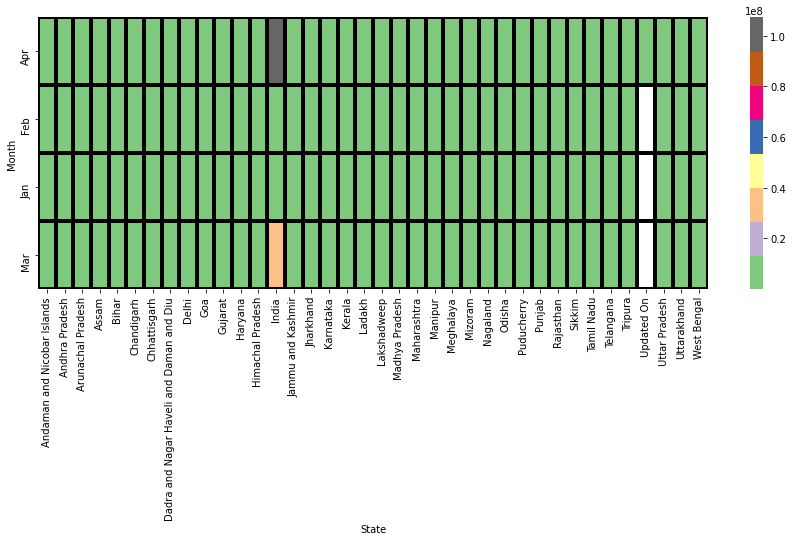

In [53]:
plt.subplots(figsize = (15,5))

Cp = covid_vac.pivot_table(index = "Month" , columns = "State" , values = "Total Doses Administered")

sns.heatmap(Cp , cmap = 'Accent' , linecolor = 'black' , linewidth = 3 , fmt = '.5g' , square = False)

## Statewise Testing Details !

In [54]:
covid_test = pd.read_csv("drive/MyDrive/covid_19/StatewiseTestingDetails.csv")
covid_test.sample(5)

,Date,State,TotalSamples,Negative,Positive
7417,2020-08-09,Maharashtra,2730285.0,2204204,526081.0
12364,2020-10-08,Uttar Pradesh,11375818.0,NaN,NaN
1943,2021-05-06,Bihar,26986790.0,NaN,NaN
11051,2021-03-30,Sikkim,82848.0,NaN,NaN
870,2020-07-26,Arunachal Pradesh,59558.0,57541,1158.0


In [55]:
## States with Total Sample collections !

covid_sample = covid_test.groupby("State")["TotalSamples"].sum().sort_values(ascending = False).reset_index()

covid_sample.head()

,State,TotalSamples
0,Uttar Pradesh,6.568151e+09
1,Bihar,4.591827e+09
2,Tamil Nadu,3.978074e+09
3,Karnataka,3.907143e+09
4,Maharashtra,3.857795e+09


In [56]:
fig = px.line(covid_sample , x = "State" , y = "TotalSamples" , \
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Top 10 States with Total Sample Collectons !!")

fig.show()

## Positive cases rises in India !

In [57]:
covid_positive = covid_test.groupby("State")["Positive"].sum().sort_values(ascending = False).reset_index()

fig = px.line(covid_positive , x = "State" , y = "Positive" ,
              color_discrete_sequence = px.colors.qualitative.Antique ,
              title = "Positive Cases Rises in India !!")

fig.show()

## Let's make some predictions for upcoming cases in future !

In [58]:
covid_confirmed = covid_india.groupby("Date")["Confirmed"].sum().reset_index()

covid_confirmed.head()

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [59]:
covid_confirmed = covid_confirmed.rename(columns={"Date" : "ds" , "Confirmed" : "y"})

covid_confirmed.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


## Creating and fitting the Prophet model with default values !

In [60]:
from fbprophet import Prophet

model_c = Prophet(changepoint_prior_scale = 0.01).fit(covid_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predicting the values for the future !!

In [61]:
future_c = model_c.make_future_dataframe(periods = 80)
future_c.tail(2)

,ds
535,2021-07-18
536,2021-07-19


In [62]:
forecast_c = model_c.predict(future_c)

forecast_c.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
532,2021-07-15,1.713895e+07,1.616044e+07,1.808044e+07,1.672637e+07,1.753572e+07,23222.285155,23222.285155,23222.285155,23222.285155,23222.285155,23222.285155,0.0,0.0,0.0,1.716217e+07
533,2021-07-16,1.717575e+07,1.622665e+07,1.826582e+07,1.674979e+07,1.758276e+07,31366.340830,31366.340830,31366.340830,31366.340830,31366.340830,31366.340830,0.0,0.0,0.0,1.720712e+07
534,2021-07-17,1.721255e+07,1.619839e+07,1.820684e+07,1.678021e+07,1.762889e+07,-21107.374851,-21107.374851,-21107.374851,-21107.374851,-21107.374851,-21107.374851,0.0,0.0,0.0,1.719145e+07
535,2021-07-18,1.724936e+07,1.619901e+07,1.829976e+07,1.679774e+07,1.767549e+07,-14926.545602,-14926.545602,-14926.545602,-14926.545602,-14926.545602,-14926.545602,0.0,0.0,0.0,1.723443e+07
536,2021-07-19,1.728616e+07,1.624989e+07,1.830789e+07,1.682697e+07,1.772056e+07,-9265.937951,-9265.937951,-9265.937951,-9265.937951,-9265.937951,-9265.937951,0.0,0.0,0.0,1.727690e+07


## Plotting the Predicted Data !!

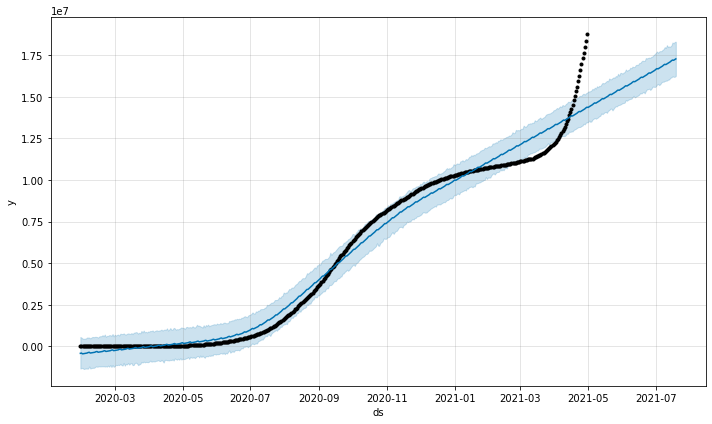

In [63]:
from fbprophet.plot import plot_plotly

fig1 = model_c.plot(forecast_c)

## Plotting the Forecasted Components !

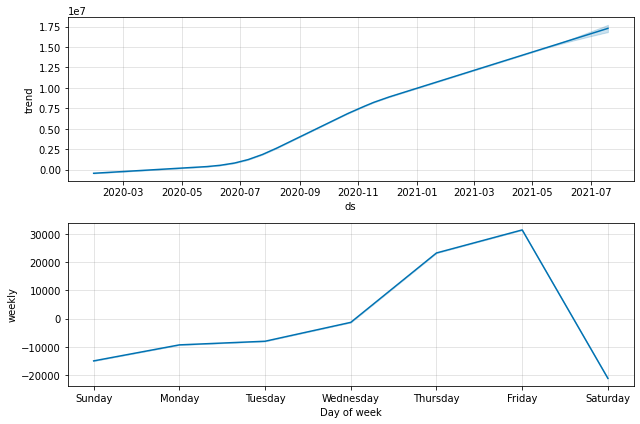

In [64]:
fig1 = model_c.plot_components(forecast_c)

## Adding ChangePoints to Prophet !

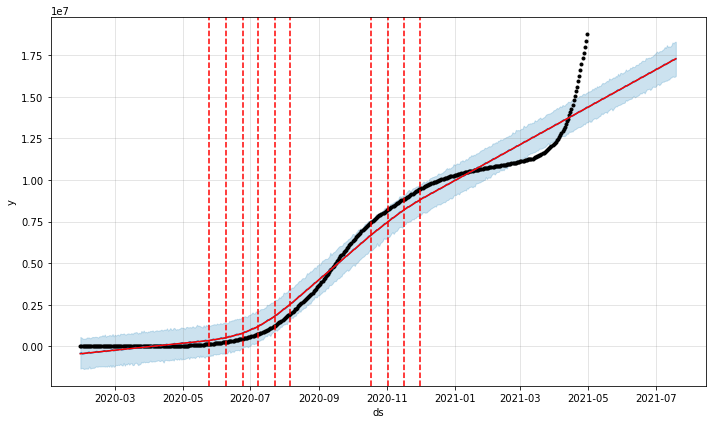

In [65]:
from fbprophet.plot import add_changepoints_to_plot

fig = model_c.plot(forecast_c)

a = add_changepoints_to_plot(fig.gca(), model_c, forecast_c)

## Let's make some prediction on deaths in India !

In [66]:
covid_deaths.head()

,Date,Deaths
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


In [67]:
covid_deaths = covid_deaths.rename(columns={"Date":"ds" , "Deaths":"y"})

covid_deaths.tail()

,ds,y
452,2021-04-26,195123
453,2021-04-27,197894
454,2021-04-28,201187
455,2021-04-29,204832
456,2021-04-30,208330


## Creating and fitting the Prophet Deaths Model with default values !

In [68]:
model_d = Prophet(changepoint_prior_scale = 0.01).fit(covid_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predicting the values for the Future Deaths !

In [69]:
future_d = model_d.make_future_dataframe(periods = 80)
future_d.tail(2)

,ds
535,2021-07-18
536,2021-07-19


In [70]:
forecast_d = model_d.predict(future_d)

forecast_d.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
532,2021-07-15,198133.289436,187925.687470,208829.555825,189896.715602,207900.711078,159.239473,159.239473,159.239473,159.239473,159.239473,159.239473,0.0,0.0,0.0,198292.528909
533,2021-07-16,198400.947397,188612.449579,209549.653037,189991.150009,208312.864479,250.935937,250.935937,250.935937,250.935937,250.935937,250.935937,0.0,0.0,0.0,198651.883334
534,2021-07-17,198668.605357,188726.079633,209411.661930,190035.864218,208724.558042,-162.282789,-162.282789,-162.282789,-162.282789,-162.282789,-162.282789,0.0,0.0,0.0,198506.322568
535,2021-07-18,198936.263318,187698.486760,209893.897147,190049.429633,209139.471053,-120.134897,-120.134897,-120.134897,-120.134897,-120.134897,-120.134897,0.0,0.0,0.0,198816.128420
536,2021-07-19,199203.921278,188393.318407,210033.661126,190065.971343,209557.182791,-90.448795,-90.448795,-90.448795,-90.448795,-90.448795,-90.448795,0.0,0.0,0.0,199113.472483


## Plotting the Predicted Deaths Data !

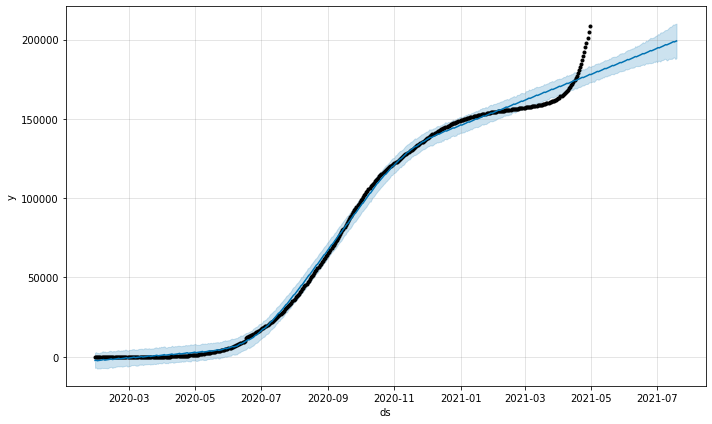

In [71]:
fig2 = model_d.plot(forecast_d)

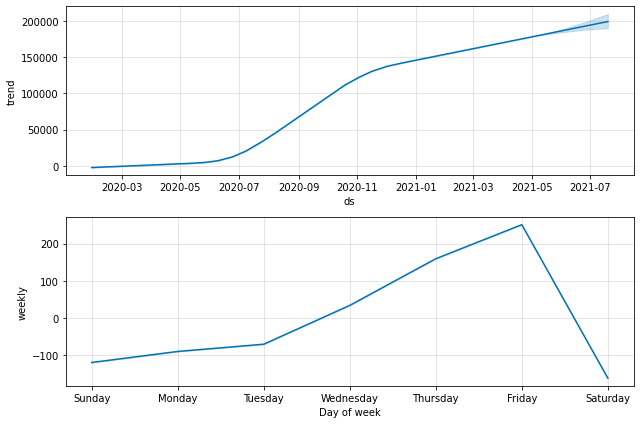

In [72]:
## Plotting the forecasted components !

fig2 = model_d.plot_components(forecast_d)

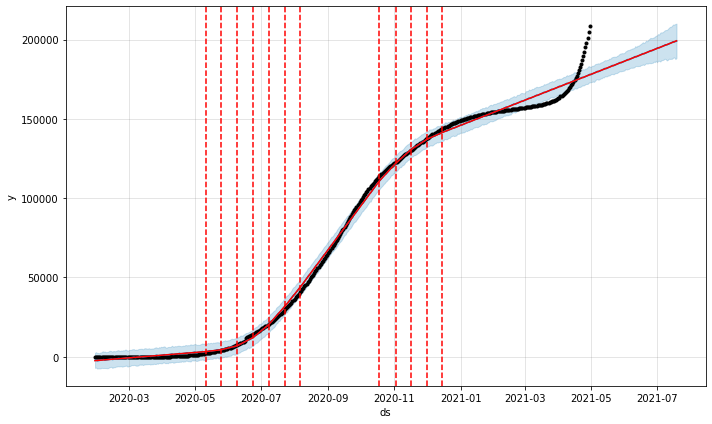

In [73]:
## Adding ChangePoints to Prophet !

fig = model_d.plot(forecast_d)

b = add_changepoints_to_plot(fig.gca(), model_d, forecast_d)